In [100]:
import os
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [119]:
data_dir = 'D:\sign-lang\My-Data\signdata'  # path to original data directory
new_data_dir = 'D:\sign-lang\My-Data\processdata'  # path to new data after preprocessing 
scale = 0.5 # scaling factor
augment = 10 # num of augmented images per image

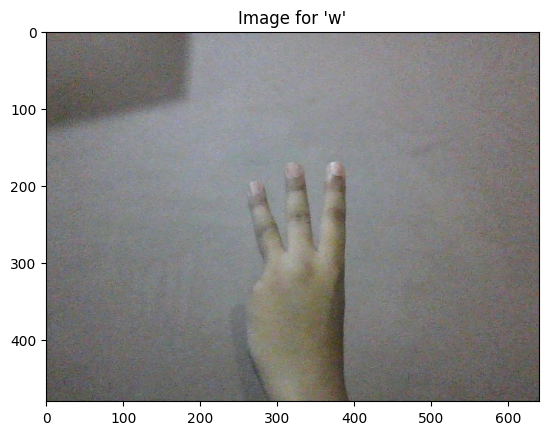

In [4]:
folder = os.listdir(data_dir) # list of all the folder
random_folder = random.choice(folder) # selects a random folder
folder_path = os.path.join(data_dir, random_folder)

image = os.listdir(folder_path) #list of all the images in selected folder
random_img = random.choice(image) # selects a random image
image_path = os.path.join(folder_path, random_img)

#display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Image for '{random_folder}'")
plt.show()

In [4]:
def preprocess(data_dir, new_data_dir, scale, augment):
    
    datagen = ImageDataGenerator( # image data generator for augmentation
        rotation_range=10,      # randomly rotate images by 10 degrees
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1, # randomly shift images vertically 
        zoom_range=0.2,         # randomly zooms on images
        horizontal_flip=True,   # randomly flip images horizontally
        fill_mode='nearest'     # fill newly created pixels by its nearest pixel
    )
    
    os.makedirs(new_data_dir, exist_ok=True) #it will check if dir exist else it will make it
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        
        if os.path.isdir(folder_path): #if folder is also a dir 
            new_folder_path = os.path.join(new_data_dir, folder) #creat the same dir in the new data dir i.e. process data dir
            os.makedirs(new_folder_path, exist_ok=True)
            
            for data in os.listdir(folder_path):
                img_path = os.path.join(folder_path, data)
                with Image.open(img_path) as img:
                    new_size = (int(img.width * scale), int(img.height * scale)) #new size of image after scaling 
                    new_img = img.resize(new_size, Image.LANCZOS)
                    new_img.save(os.path.join(new_folder_path, data))
                img = load_img(img_path)
                arr_img = img_to_array(img)  # it converts images to numpy array
                arr_img = arr_img.reshape((1,)+ arr_img.shape)
                
                i=0
                for n in datagen.flow(arr_img, batch_size=1, save_to_dir=new_folder_path, save_prefix=folder, save_format='jpg'):
                    i += 1
                    if i >=augment:
                        break
                    

In [5]:
preprocess(data_dir, new_data_dir, scale, augment)

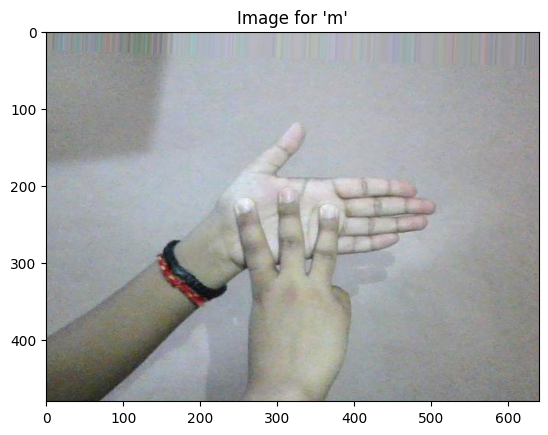

In [19]:
new_folder = os.listdir(new_data_dir)
new_random_folder = random.choice(new_folder) # selects a random folder
new_folder_path = os.path.join(new_data_dir, new_random_folder)

new_images = os.listdir(new_folder_path) #all the images in selected folder

new_random_img = random.choice(new_images) # selects a random image
new_image_path = os.path.join(new_folder_path, new_random_img)

#display the image
new_img = Image.open(new_image_path)
plt.imshow(new_img)
plt.title(f"Image for '{new_random_folder}'")
plt.show()

In [20]:
def grayscale_image(new_data_dir):
    # Traverse the input root directory recursively
    for data, _, images in os.walk(new_data_dir):
        for image in images:
            image_path = os.path.join(data, image)
            
            # Convert image to grayscale and save
            with Image.open(image_path) as img:
                grayscale_img = img.convert('L')  # Convert image to grayscale
                grayscale_img.save(image_path)

In [21]:
grayscale_image(new_data_dir)

In [135]:
def random_image(new_data_dir):

    new_folder = os.listdir(new_data_dir)
    new_random_folder = random.choice(new_folder)
    new_folder_path = os.path.join(new_data_dir, new_random_folder)

    new_images = os.listdir(new_folder_path)
    new_random_img = random.choice(new_images)
    new_image_path = os.path.join(new_folder_path, new_random_img)
    
    new_img = Image.open(new_image_path)
    return new_img, new_random_folder

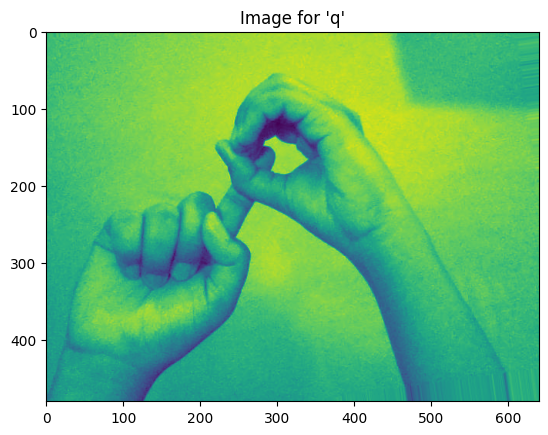

In [144]:
new_img, new_random_folder = random_image(new_data_dir)

#plotting the image
plt.imshow(new_img)
plt.title(f"Image for '{new_random_folder}'")
plt.show()

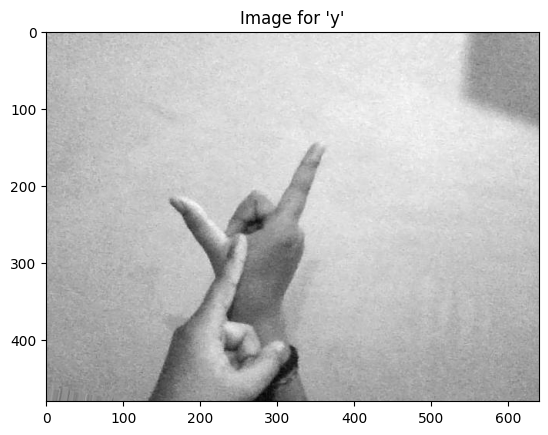

In [161]:
new_img, new_random_folder = random_image(new_data_dir)

#plotting the image in gray
plt.imshow(new_img, cmap='gray')
plt.title(f"Image for '{new_random_folder}'")
plt.show()

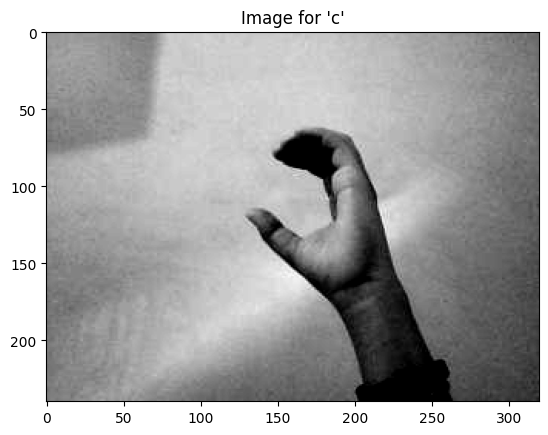

In [172]:
new_img, new_random_folder = random_image(new_data_dir)

enhancer = ImageEnhance.Contrast(new_img)
enhanced_image = enhancer.enhance(2)  # contrast image by 2

#plotting the contrasted image
plt.imshow(enhanced_image, cmap='gray')
plt.title(f"Image for '{new_random_folder}'")
plt.show()

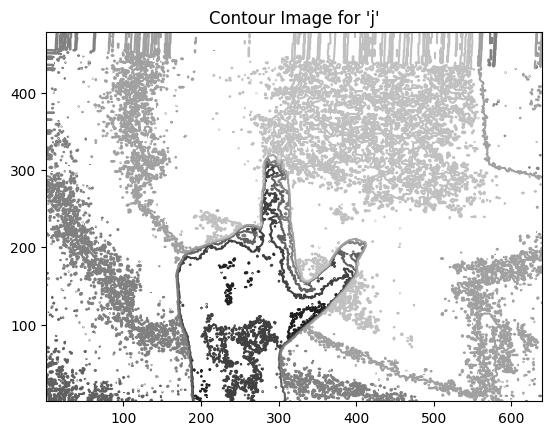

In [173]:
new_img, new_random_folder = random_image(new_data_dir)

# plotting the contour image
plt.contour(new_img, cmap='gray', origin='image')
plt.title(f"Contour Image for '{new_random_folder}'")
plt.show()

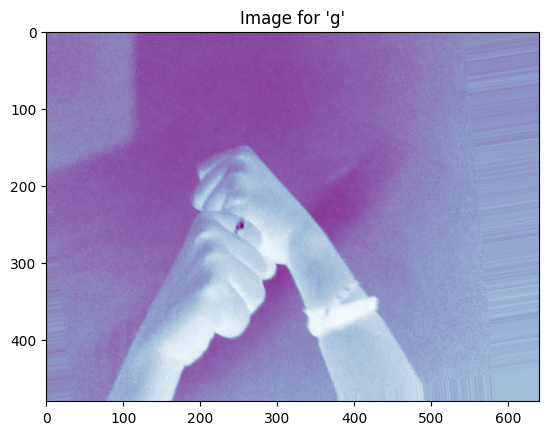

In [183]:
new_img, new_random_folder = random_image(new_data_dir)

plt.imshow(new_img, cmap='BuPu')
plt.title(f"Image for '{new_random_folder}'")
plt.show()